In [4]:
import warnings; warnings.filterwarnings('ignore')

import os
import sys
sys.path.insert(0, '..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 5)
mpl.rcParams['axes.grid'] = False

from pathlib import Path
base = Path('..')

In [5]:
path = base / 'resources' / 'hutton_flow.csv'
df = pd.read_csv(path, parse_dates=['Quarter Hour'], index_col='Quarter Hour')
df['Total'] = df['Upstream'] + df['Downstream']
df['Diff'] = (df['Upstream'] - df['Downstream'])/2
df['Upstream2'] = df['Upstream'] + df['Diff']
df['Downstream2'] = df['Downstream'] - df['Diff']

df = df[['Upstream2', 'Downstream2']]
df.columns = ['Upstream', 'Downstream']
df = np.abs(df)
df = df.iloc[12:]
df.head()

,Upstream,Downstream
Quarter Hour,,
2020-10-01 03:00:00,45.0,41.0
2020-10-01 03:15:00,79.0,27.0
2020-10-01 03:30:00,90.0,54.0
2020-10-01 03:45:00,116.0,40.0
2020-10-01 04:00:00,128.5,38.5


In [7]:
path = base / 'resources' / 'flows.csv'
df.to_csv(path)

In [56]:
df.describe()

,Upstream,Downstream
count,84.000000,84.000000
mean,1646.035714,1649.678571
std,931.853335,940.207118
min,89.000000,67.000000
25%,789.875000,1075.875000
50%,1794.000000,1594.500000
75%,2289.500000,2286.500000
max,3392.500000,3484.500000


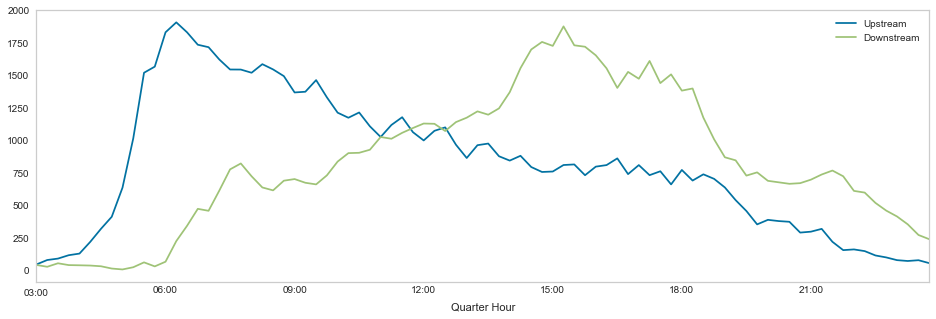

In [6]:
df.plot();

In [18]:
df.dtypes

Quarter Hour    object
Upstream         int64
Downstream       int64
dtype: object